In [1]:
import sys
sys.path.append('..')

In [2]:
import librosa
import torch
import numpy as np
import matplotlib.pyplot as plt
import IPython

In [77]:
n_fft = 8192
hop_length = n_fft // 4

print(n_fft)
print(hop_length)

def get_mfcc(data, sr):
    mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=5, n_fft=n_fft, hop_length=hop_length, center=False)
    mfcc = torch.from_numpy(np.transpose(mfcc))
    return mfcc

def get_mfcc_top_db(data, sr):
    db = librosa.power_to_db(data, top_db=None)
    mfcc = librosa.feature.mfcc(y=db, sr=sr, n_mfcc=5, n_fft=n_fft, hop_length=hop_length, center=False)
    mfcc = torch.from_numpy(np.transpose(mfcc))
    return mfcc

8192
2048


In [19]:
data, sr = librosa.load('../wav/test1.wav', sr = None, mono = True)
print(data.shape)

(4352000,)


In [20]:
full_mfcc = get_mfcc(data, sr)
print(full_mfcc.shape)

torch.Size([2122, 5])


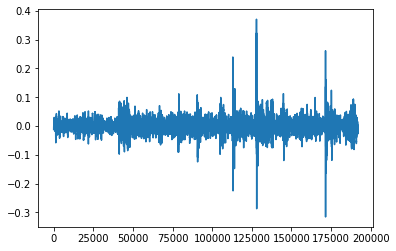

In [78]:
seg_data = data[115 * sr:(115 + 12) * sr]
seg = get_mfcc(seg_data, sr)
seg_td = get_mfcc_top_db(seg_data, sr)

plt.plot(seg_data)
IPython.display.Audio(data=seg_data, rate=sr)

True
True


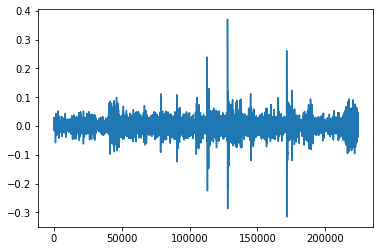

In [84]:
part_mfcc = get_mfcc(data[115 * sr:(115 + 14) * sr], sr)
part_mfcc_td = get_mfcc_top_db(data[115 * sr:(115 + 48) * sr], sr)

plt.plot(data[115 * sr:(115 + 14) * sr])

print(all(seg[0] == part_mfcc[0])) # mfcc level: not eq. when data[...:(115 + 38) * sr] is added. WHYYYY?
print(all(seg_td[0] == part_mfcc_td[0]))

True


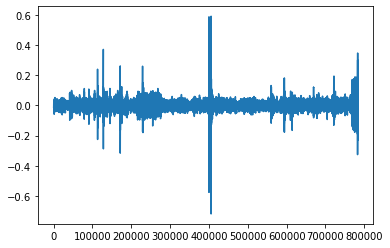

In [41]:
print(all(data[115 * sr:125 * sr] == seg_data[:10 * sr]))

plt.plot(data[115 * sr:(115 + 49) * sr])
IPython.display.Audio(data=data[115 * sr:(115 + 49) * sr], rate=sr)